In [18]:
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
import math
import importlib
import analyse as an
importlib.reload(an)

<module 'analyse' from '/Users/adamnapieralski/Projects/private/mtd-dare-kubernetes/resources-analysis/analyse.py'>

In [9]:
s = an.get_data_series_new('resource-metrics.mtd-deployment.i30.no-req.0-mtd-0.2021.05.26.14.00.46.json')
# an.plot_series_new(s, '')

/Users/adamnapieralski/Projects/private/mtd-dare-kubernetes/resources-analysis/analyse.py:36: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_series = df.groupby(['timestamp', 'pod'])['cpu', 'memory'].sum()


/Users/adamnapieralski/Projects/private/mtd-dare-kubernetes/resources-analysis/analyse.py:36: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_series = df.groupby(['timestamp', 'pod'])['cpu', 'memory'].sum()


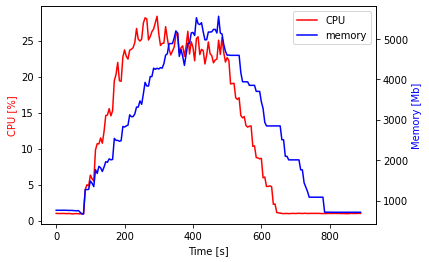

In [21]:
s = an.get_data_series_new('resource-metrics.mtd-deployment.i30.no-req.0-mtd-0.2021.05.26.14.00.46.json')
an.plot_series_new(s, '')

/Users/adamnapieralski/Projects/private/mtd-dare-kubernetes/resources-analysis/analyse.py:36: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_series = df.groupby(['timestamp', 'pod'])['cpu', 'memory'].sum()


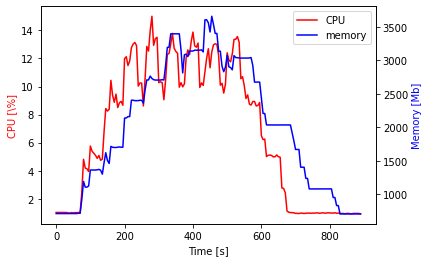

In [17]:
a = an.get_data_series_new('resource-metrics.mtd-deployment.i60.no-req.0-mtd-0.2021.05.26.14.23.00.json')
an.plot_series_new(a, '')

In [4]:
# b = a.groupby(['timestamp', 'pod'])['memory'].sum()
a['pod'] = a['pod'].apply(lambda x: re.match(r'^(\w+)-.*', x).groups()[0])

In [5]:
b = a.groupby(['timestamp', 'pod'])['cpu', 'memory'].sum()
# b = b.to_frame()
# b.loc()
b

ipykernel_launcher:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,,cpu,memory
timestamp,pod,,
2021-05-25 21:54:16.581543,wordpress,0.414324,3039.058594
2021-05-25 21:54:21.606472,wordpress,0.407436,3037.253906
2021-05-25 21:54:26.630024,wordpress,0.392517,3037.253906
2021-05-25 21:54:31.654469,wordpress,0.369443,3039.117188
2021-05-25 21:54:36.676691,wordpress,0.359346,3041.605469
2021-05-25 21:54:41.695729,wordpress,0.351779,3042.300781
2021-05-25 21:54:46.730901,wordpress,0.352862,3042.375000
2021-05-25 21:54:51.752179,wordpress,0.354267,3042.375000
2021-05-25 21:54:56.792991,wordpress,0.350653,3042.375000


In [140]:
l = np.array([x[1] for x in b.index])
ids = np.where(l == 'wp-apache')[0]
b['cpu'][ids]
# b.columns.tolist()
# b[ids]
# b = b[ids]
# tl = [t[0] for t in b.index]
# t1, t2 = tl[0], tl[1]
# dt = t2 - t1
# math.floor(dt.total_seconds())


timestamp                   pod      
2021-05-25 16:47:34.793194  wp-apache    0.001208
2021-05-25 16:47:39.816205  wp-apache    0.001220
2021-05-25 16:47:44.838612  wp-apache    0.003219
2021-05-25 16:47:49.854001  wp-apache    0.012383
2021-05-25 16:47:54.881029  wp-apache    0.012964
2021-05-25 16:47:59.909012  wp-apache    0.014786
2021-05-25 16:48:04.971864  wp-apache    0.015725
2021-05-25 16:48:09.997971  wp-apache    0.017519
2021-05-25 16:48:15.020748  wp-apache    0.017500
2021-05-25 16:48:20.077341  wp-apache    0.024678
2021-05-25 16:48:25.148459  wp-apache    0.027775
2021-05-25 16:48:30.175846  wp-apache    0.027905
2021-05-25 16:48:35.198544  wp-apache    0.030312
2021-05-25 16:48:40.217309  wp-apache    0.032283
2021-05-25 16:48:45.240586  wp-apache    0.036962
2021-05-25 16:48:50.261532  wp-apache    0.039559
2021-05-25 16:48:55.282850  wp-apache    0.043598
2021-05-25 16:49:00.305819  wp-apache    0.043023
2021-05-25 16:49:05.328230  wp-apache    0.043532
2021-05-25 1

In [141]:
servers = [
    { 'name': 'nginx', 'pod': 'wordpress-nginx' },
    { 'name': 'apache', 'pod': 'wp-apache' }
]

next((x for x in servers if x['name'] == )))

TypeError: 'list' object is not an iterator